## Plotting

### matplotlib
based on Matlab plotting.

Designed to make "easy things easy and hard things possible"

* Plots look good -- publication quality
* Can output to pdf / postscript / svg (scalable vector graphics) / png bitmap image / .....

* several ways to use it: see http://matplotlib.org/faq/usage_faq.html#matplotlib-pyplot-and-pylab-how-are-they-related
  * in the notebook we will import the commands inline
    * this imports all numpy and matplotlib.pyplot commands into the namespace 
    * similarly, if using ipython prompt: `ipython --pylab` imports numpy and pyplot commands -- pulls up a plotting window that looks better than those in this notebook.
    
  * recommended use for publication quality is `import matplotlib.pyplot as plt`



In [1]:
import matplotlib.pyplot as plt
import numpy as np



In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
x = np.arange(100) / 100. * 2. * np.pi

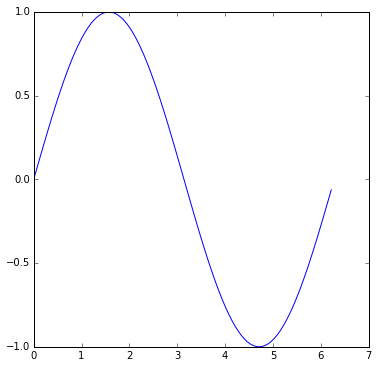

In [4]:
figure(figsize = (6,6))  #these are all matplotlib.pyplot commands
clf()
plot(x, np.sin(x))

In [5]:
clf()

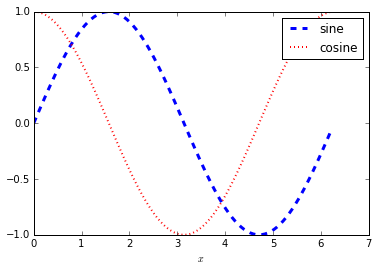

In [6]:
plot(x, np.sin(x), 'b--', lw = 3, label = 'sine')
plot(x, np.cos(x), 'r:' , lw = 2, label = 'cosine')
xlabel('$x$')
legend()

<Container object of 3 artists>

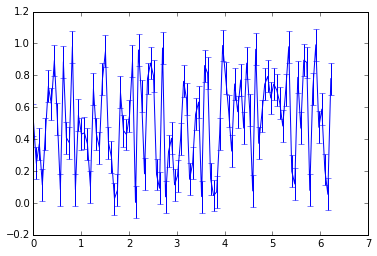

In [7]:
mydata = np.random.random(100)
errors = .1 * ones(100)
errorbar(x, mydata, errors)

<Container object of 3 artists>

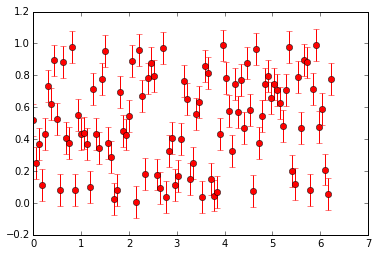

In [8]:
errorbar(x, mydata, errors, fmt = 'o', color = 'red')

## Plotting data from a file

* We will plot the CMB power spectra -- these are theory curves of the CMB fluctuations on a given inverse angular scale.  Compare with data from Planck satellite taken from the publication http://inspirehep.net/record/1343460: 


![alt text](http://inspirehep.net/record/1343460/files/Figures_planck2014_TT_Dl_NORES_bin30_w88mm.png)

First we load the theoretical "data", values at every integer.  For this we use the output of the standard cosmological theory code CAMB, http://camb.info/readme.html


In [9]:
mydata = numpy.loadtxt('fiducial_scalCls.dat')

In [10]:
mydata

array([[  2.00000000e+00,   1.07730000e+03,   4.54180000e-02,
          3.22610000e+00,   1.08860000e+06,   2.96170000e+04],
       [  3.00000000e+00,   1.01760000e+03,   7.06620000e-02,
          3.91630000e+00,   1.67690000e+06,   3.54390000e+04],
       [  4.00000000e+00,   9.58680000e+02,   7.56820000e-02,
          3.94170000e+00,   2.19850000e+06,   3.81960000e+04],
       ..., 
       [  6.49800000e+03,   1.19370000e-02,   7.37840000e-05,
          1.28670000e-04,   1.67410000e+04,   2.15900000e-01],
       [  6.49900000e+03,   1.19210000e-02,   7.36450000e-05,
          1.28640000e-04,   1.67370000e+04,   2.16390000e-01],
       [  6.50000000e+03,   1.19050000e-02,   7.35030000e-05,
          1.28600000e-04,   1.67320000e+04,   2.16870000e-01]])

In [11]:
mydata.shape

(6499, 6)

Row 0 is the X axis, row 1 is the Y axis.  Other rows are related things that we won't plot for now.

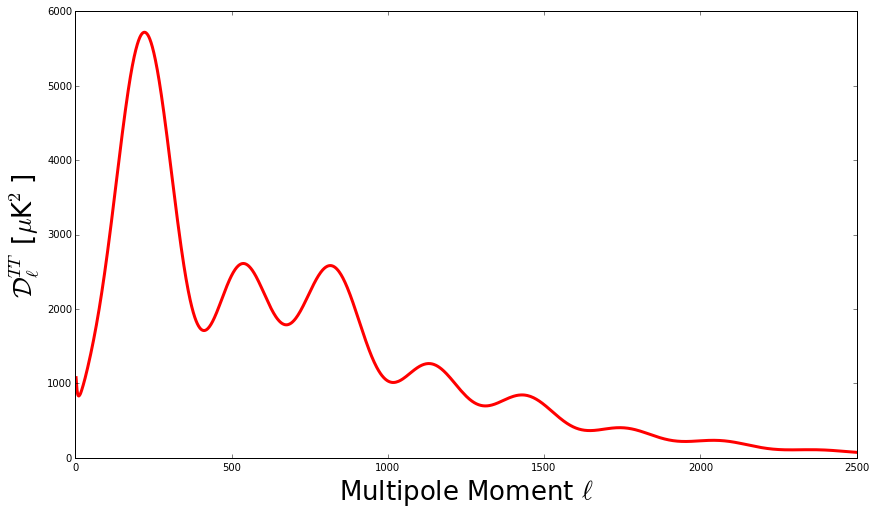

In [12]:
figsize(14, 8)
plot(mydata[:,0], mydata[:,1], 'r', linewidth = 3)
xlim([0,2500])

xlabel('Multipole Moment $\ell$',fontsize = 26)
ylabel('$\mathcal{D}_\ell^{TT}$ [$\mu$K$^2$]',fontsize = 26)



## 2d array data
* Often you will wish to look at image data.
* Example:  plane waves in two dimensions with a gaussian envelope in x, $\sin(ax) \sin(by) e^{-x^2}$ 


In [13]:
def g(x, y, a = 4, b = 5, c = 8):
    
    return np.sin(a * x) * np.sin( b * y ) * np.exp(-c * x**2)

N = 100

x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)



In [14]:
x

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182,
       -0.7979798 , -0.77777778, -0.75757576, -0.73737374, -0.71717172,
       -0.6969697 , -0.67676768, -0.65656566, -0.63636364, -0.61616162,
       -0.5959596 , -0.57575758, -0.55555556, -0.53535354, -0.51515152,
       -0.49494949, -0.47474747, -0.45454545, -0.43434343, -0.41414141,
       -0.39393939, -0.37373737, -0.35353535, -0.33333333, -0.31313131,
       -0.29292929, -0.27272727, -0.25252525, -0.23232323, -0.21212121,
       -0.19191919, -0.17171717, -0.15151515, -0.13131313, -0.11111111,
       -0.09090909, -0.07070707, -0.05050505, -0.03030303, -0.01010101,
        0.01010101,  0.03030303,  0.05050505,  0.07070707,  0.09090909,
        0.11111111,  0.13131313,  0.15151515,  0.17171717,  0.19191919,
        0.21212121,  0.23232323,  0.25252525,  0.27272727,  0.29292929,
        0.31313131,  0.33333333,  0.35353535,  0.37373737,  0.39

In [15]:
xv, yv = np.meshgrid(x, y )

In [16]:
xv.shape

(100, 100)

<matplotlib.colorbar.Colorbar instance at 0x7f117adef4d0>

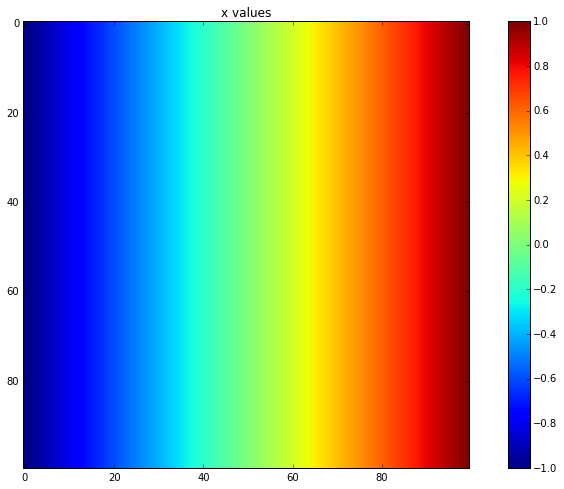

In [17]:
plt.imshow(xv)
plt.title("x values")
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7f117ae0c758>

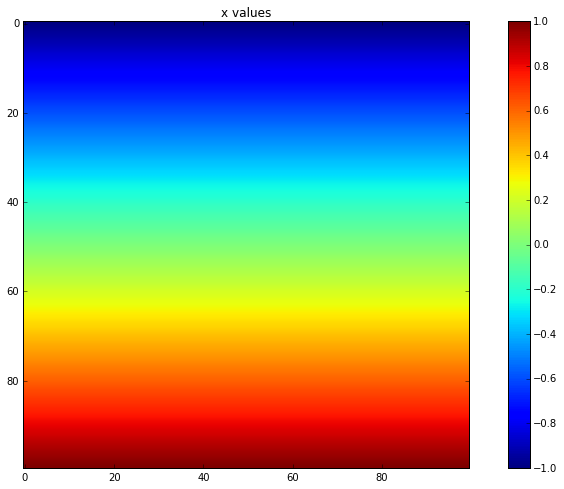

In [18]:
plt.imshow(yv)
plt.title("x values")
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7f117ab1cbd8>

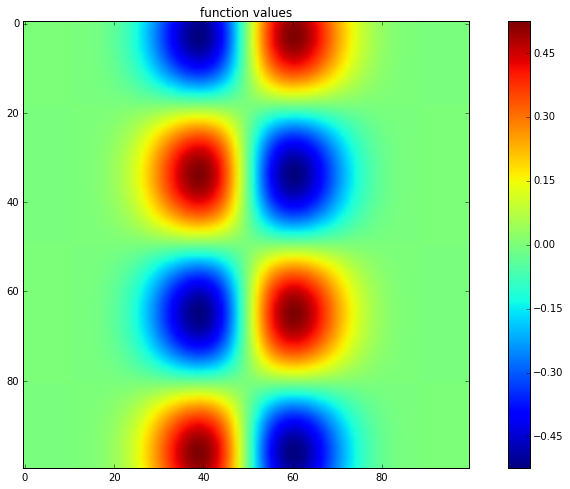

In [19]:
vals = g(xv, yv)
plt.imshow(vals)
plt.title("function values")
plt.colorbar()


# color schemes
A lot of people have issues with the default color scheme.  
* looks awful and meaningless in black and white
* does not work well for colorblind people
* no relation between "distance" in colorspace and numerical values.

http://matplotlib.org/examples/color/colormaps_reference.html


Apparently default will change soon.  Let's try blue/white

<matplotlib.colorbar.Colorbar instance at 0x7f11789ffe18>

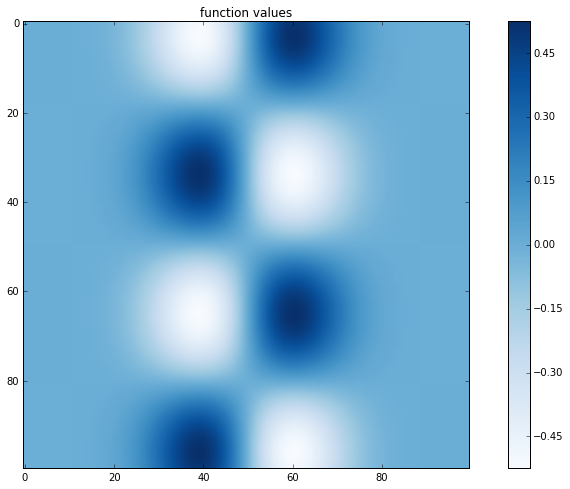

In [20]:

plt.imshow(vals, cmap = 'Blues')
plt.title("function values")
plt.colorbar()

## let's take a slice through our image and plot.

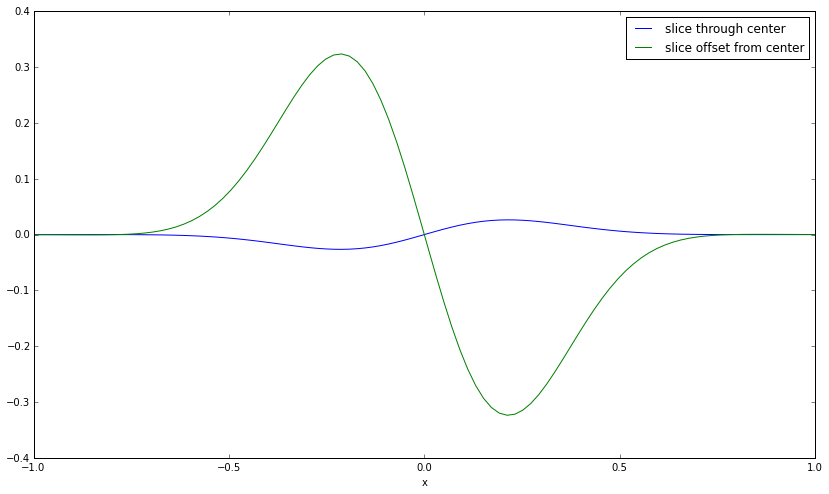

In [21]:
plt.plot(x,vals[N/2,:], label = 'slice through center')
plt.plot(x,vals[N/4,:], label = 'slice offset from center')
plt.xlabel('x')
plt.legend()

